### 분류 (100점)
- 데이터 선정(20):
> 어떠한 데이터라도 상관 없음 (캐글 데이터, 인터넷에서 구한 데이터, 직접 수집한 데이터 등) https://www.kaggle.com/datasets
>
> 데이터를 선정한 이유 서술
- 데이터 전처리(25) : 방법, 이유, 파이썬 코드
- 분류 및 파라미터 최적화(30) : 방법, 이유, 파이썬 코드 
- 결과 및 분석, 고찰(25)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace=True)
df.shape

(302, 14)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trtbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalachh,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exng,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In [9]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


In [10]:
df1 = df.drop(cat_cols, axis=1)
df1.head()

,age,trtbps,chol,thalachh,oldpeak,output
0,63,145,233,150,2.3,1
1,37,130,250,187,3.5,1
2,41,130,204,172,1.4,1
3,56,120,236,178,0.8,1
4,57,120,354,163,0.6,1


<AxesSubplot:>

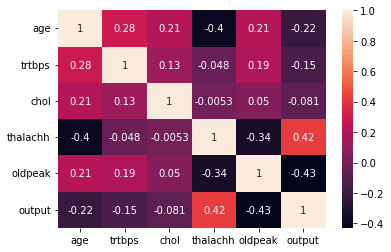

In [11]:
sns.heatmap(df1.corr().transpose(), annot=True)

In [12]:
#sns.pairplot(df,kind="kde",hue="output")

In [13]:
X = df.drop(["output"],axis=1)
y = df["output"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
x_train = X_train
x_test = X_test

In [14]:
StandardScaler = StandardScaler()
X_train_scaled = StandardScaler.fit_transform(X_train)
X_test_scaled = StandardScaler.transform(X_test)

In [15]:
MinMaxScaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = MinMaxScaler.fit_transform(x_train)
x_test_scaled = MinMaxScaler.transform(x_test)

### 로지스틱 ( Logistic ) 회귀 

In [ ]:
model = LogisticRegression()

model.fit(X_train_scaled, y_train)
predict = model.predict(X_test_scaled)
acc = accuracy_score(y_test, predict)

print(acc*100)

In [ ]:
model = LogisticRegression()

model.fit(x_train_scaled, y_train)
predict = model.predict(x_test_scaled)
acc = accuracy_score(y_test, predict)

print(acc*100)

### KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier(n_neighbors=1)

model.fit(X_train_scaled, y_train)
predict = model.predict(X_test_scaled)
acc = accuracy_score(y_test, predict)

print(acc*100)

In [ ]:
model = KNeighborsClassifier(n_neighbors=1)

model.fit(x_train_scaled, y_train)
predict = model.predict(x_test_scaled)
acc = accuracy_score(y_test, predict)

print(acc*100)

In [ ]:
error_rate = []
  
for i in range(1, 40):
      
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train, y_train)
    pred_i = model.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
  
plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
  
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)

model.fit(x_train_scaled, y_train)
predict = model.predict(x_test_scaled)
acc = accuracy_score(y_test, predict)

print(acc*100)

### VotingClassifier

In [ ]:
lr = LogisticRegression(solver='liblinear')
knn = KNeighborsClassifier(n_neighbors=5)

model = VotingClassifier(estimators=[('LR', lr), ('KNN', knn)], 
                         voting='soft')

model.fit(X_train_scaled, y_train)
predict = model.predict(X_test_scaled)
acc = accuracy_score(y_test, predict)

print(acc*100)

In [ ]:
lr = LogisticRegression(solver='liblinear')
knn = KNeighborsClassifier(n_neighbors=5)

model = VotingClassifier(estimators=[('LR', lr), ('KNN', knn)], 
                         voting='soft')

model.fit(x_train_scaled, y_train)
predict = model.predict(x_test_scaled)
acc = accuracy_score(y_test, predict)

print(acc*100)

### DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(max_depth=1)

model.fit(X_train_scaled, y_train)
predict = model.predict(X_test_scaled)
acc = accuracy_score(y_test, predict)

print(acc*100)

In [ ]:
model = DecisionTreeClassifier(max_depth=1)

model.fit(x_train_scaled, y_train)
predict = model.predict(x_test_scaled)
acc = accuracy_score(y_test, predict)

print(acc*100)

In [ ]:
params = {
    'max_depth' : [1,2,3,4,5,6,7,8,9],
}
cv = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=5)
cv.fit(X_train_scaled, y_train)
print(cv.best_score_)
print(cv.best_params_)

In [ ]:
model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train_scaled, y_train)
predict = model.predict(X_test_scaled)
acc = accuracy_score(y_test, predict)

print(acc*100)

###  RandomForestClassifier

In [ ]:
model = RandomForestClassifier()

model.fit(X_train_scaled, y_train)
predict = model.predict(X_test_scaled)
acc = accuracy_score(y_test, predict)

print(acc*100)

In [ ]:
model = RandomForestClassifier()

model.fit(x_train_scaled, y_train)
predict = model.predict(x_test_scaled)
acc = accuracy_score(y_test, predict)

print(acc*100)

In [ ]:
params = {
    'max_depth' : [5, 10, 15, 20],
    'min_samples_leaf' : [4, 6, 8],
    'min_samples_split' : [4, 6, 8],
    'n_estimators' : [100, 200]
}
cv = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=5)
cv.fit(X_train_scaled, y_train)
print(cv.best_score_)
print(cv.best_params_)

In [ ]:
model = RandomForestClassifier(max_depth=5, min_samples_leaf=4, 
                               min_samples_split=6, n_estimators=200)

model.fit(X_train_scaled, y_train)
predict = model.predict(X_test_scaled)
acc = accuracy_score(y_test, predict)

print(acc*100)

### AdaBoostClassifier

In [ ]:
model = AdaBoostClassifier()

model.fit(X_train_scaled, y_train)
predict = model.predict(X_test_scaled)
acc = accuracy_score(y_test, predict)

print(acc*100)

In [ ]:
model = AdaBoostClassifier()

model.fit(x_train_scaled, y_train)
predict = model.predict(x_test_scaled)
acc = accuracy_score(y_test, predict)

print(acc*100)

In [ ]:
params = {
    'n_estimators' : [10, 20, 30, 40, 50],
    'learning_rate': [0.05, 0.1, 0.2]
}
cv = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=5)
cv.fit(X_train_scaled, y_train)
print(cv.best_score_)
print(cv.best_params_)

In [ ]:
model = AdaBoostClassifier(n_estimators=20, learning_rate=0.1)

model.fit(X_train_scaled, y_train)
predict = model.predict(X_test_scaled)
acc = accuracy_score(y_test, predict)

print(acc*100)

### GradientBoostingClassifier

In [ ]:
model = GradientBoostingClassifier()

model.fit(X_train_scaled, y_train)
predict = model.predict(X_test_scaled)
acc = accuracy_score(y_test, predict)

print(acc*100)

In [ ]:
model = GradientBoostingClassifier()

model.fit(x_train_scaled, y_train)
predict = model.predict(x_test_scaled)
acc = accuracy_score(y_test, predict)

print(acc*100)

In [ ]:
params = {
    'max_depth' : [1,2,3,4,5,6,7,8,9],
    'n_estimators' : [100, 200]
}
cv = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=5)
cv.fit(X_train_scaled, y_train)
print(cv.best_score_)
print(cv.best_params_)

In [ ]:
model = GradientBoostingClassifier(max_depth=1, n_estimators=100)

model.fit(X_train_scaled, y_train)
predict = model.predict(X_test_scaled)
acc = accuracy_score(y_test, predict)

print(acc*100)

### XGBClassifier

In [ ]:
model = XGBClassifier()

model.fit(X_train_scaled, y_train)
predict = model.predict(X_test_scaled)
acc = accuracy_score(y_test, predict)

print(acc*100)

In [ ]:
model = XGBClassifier()

model.fit(x_train_scaled, y_train)
predict = model.predict(x_test_scaled)
acc = accuracy_score(y_test, predict)

print(acc*100)

In [ ]:
params = {
    'max_depth' : [3,5,7,9],
    'min_child_weight' : [1,3,5,7],
    'colsample_bytree' : [0.5, 0.75, 0.1],
    'n_estimators' : [100, 200]
}
cv = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=5)
cv.fit(X_train_scaled, y_train)
print(cv.best_score_)
print(cv.best_params_)

In [ ]:
model = XGBClassifier(colsample_bytree=0.1, 
                      max_depth=3, 
                      min_child_weight=5, 
                      n_estimators=100)

model.fit(X_train_scaled, y_train)
predict = model.predict(X_test_scaled)
acc = accuracy_score(y_test, predict)

print(acc*100)

### LGBMClassifier

In [ ]:
model = LGBMClassifier()

model.fit(X_train_scaled, y_train)
predict = model.predict(X_test_scaled)
acc = accuracy_score(y_test, predict)

print(acc*100)

In [ ]:
model = LGBMClassifier()

model.fit(x_train_scaled, y_train)
predict = model.predict(x_test_scaled)
acc = accuracy_score(y_test, predict)

print(acc*100)

In [ ]:
params = {
    'n_estimators' : [100, 200, 300, 400, 500]
}
cv = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=5)
cv.fit(X_train_scaled, y_train)
print(cv.best_score_)
print(cv.best_params_)

In [ ]:
model = LGBMClassifier(n_estimators=300)

model.fit(X_train_scaled, y_train)
predict = model.predict(X_test_scaled)
acc = accuracy_score(y_test, predict)

print(acc*100)

### SVM( Support Vector Machine )

In [16]:
model = SVC()

model.fit(X_train_scaled, y_train)
predict = model.predict(X_test_scaled)
acc = accuracy_score(y_test, predict)

print(acc*100)

90.1639344262295


In [17]:
model = SVC()

model.fit(x_train_scaled, y_train)
predict = model.predict(x_test_scaled)
acc = accuracy_score(y_test, predict)

print(acc*100)

90.1639344262295


In [18]:
# kernel = "linear": 선형 SVM
model = SVC(kernel='linear')

model.fit(X_train_scaled, y_train)
predict = model.predict(X_test_scaled)
acc = accuracy_score(y_test, predict)

print(acc*100)

86.88524590163934


In [19]:
# kernel = "poly": 다항 커널
model = SVC(kernel='poly')

model.fit(X_train_scaled, y_train)
predict = model.predict(X_test_scaled)
acc = accuracy_score(y_test, predict)

print(acc*100)

88.52459016393442


In [20]:
#  kernel = "rbf" 또는 kernel = None: RBF 커널
model = SVC(kernel='rbf')

model.fit(X_train_scaled, y_train)
predict = model.predict(X_test_scaled)
acc = accuracy_score(y_test, predict)

print(acc*100)

90.1639344262295


In [21]:
# kernel = "sigmoid": 시그모이드 커널
model = SVC(kernel='sigmoid')

model.fit(X_train_scaled, y_train)
predict = model.predict(X_test_scaled)
acc = accuracy_score(y_test, predict)

print(acc*100)

88.52459016393442
